# Runtimes Simulation

In [1]:
import sys
sys.path.insert(0, './Trees')

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn import manifold

from DMT_tools import *


import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

from Utils_dendrograms_OPT import dendrolink, prune_dendro, from_cloud_to_dendro_sublvl,\
                                  prune_dendro_N

from Interleaving_distance import interleaving,interl_approx, dist_wrap

import persim
import ripser

# Computing Runtimes

In [10]:
import time
import multiprocessing
import psutil

N = 200
loc = 5
np.random.seed(1062022)


TIMES = []

for npts in [5,10,15,20]:
    
    tmp = 0
    times = []
    
    while tmp<N:
        
        TREES = []
        for _ in range(2):
            sig0 = np.abs(np.random.normal(3,1,1))
            sig1 = np.abs(np.random.normal(3,1,1))
            c = 100*np.array([np.random.normal(loc,sig0,npts),\
                          np.random.normal(loc,sig1,npts)]).T        

            m = squareform(pdist(c))
            T = dendrolink(m,linkage='single')
            T.make_mult(f=False)
            T.make_norms_mult()
            TREES.append(T)

            
        t0 = time.time()   

        d_l = interleaving(TREES[0], TREES[1], binary=True,approx='up', 
                                              MP=True, check=False,
                                              verbose = False)
        t1 = time.time()  

        times.append(t1-t0)
        
        tmp = len(times)
        
        print(tmp,times[-1])
    
    np.save('times_'+str(npts), times)
    TIMES.append(times)
    
    
TIMES = np.array(TIMES)


1 5.8494861125946045
2 5.913754940032959
3 6.0077290534973145
4 4.65187668800354
5 5.768312931060791
6 5.9057841300964355
7 5.857992887496948
8 4.560484886169434
9 5.7639970779418945
10 5.854029655456543
11 4.920707941055298
12 5.8211212158203125
13 5.800030946731567
14 5.824769020080566
15 4.6667399406433105
16 5.859874963760376
17 6.158104181289673
18 6.084073066711426
19 5.753698110580444
20 5.871114730834961
21 6.26501202583313
22 4.650274038314819
23 5.761255979537964
24 6.280920028686523
25 5.837009906768799
26 5.88500189781189
27 5.874078273773193
28 6.255835771560669
29 5.883076906204224
30 5.990617990493774
31 5.806926965713501
32 5.862637996673584
33 5.807004928588867
34 4.629131078720093
35 5.856677770614624
36 4.993489980697632
37 5.797080039978027
38 5.787815809249878
39 4.912137031555176
40 5.795635223388672
41 6.20046591758728
42 4.631603956222534
43 4.9926159381866455
44 5.901148080825806
45 5.753787279129028
46 4.522657871246338
47 5.882373094558716
48 4.50847315788269

179 11.231412172317505
180 9.430698871612549
181 12.323179006576538
182 10.003688097000122
183 12.906553030014038
184 11.194359064102173
185 11.859071969985962
186 9.437608003616333
187 11.318610906600952
188 9.626604080200195
189 11.563238859176636
190 13.008147954940796
191 9.429413795471191
192 10.287266969680786
193 9.636795043945312
194 8.6926748752594
195 11.503592014312744
196 8.806136846542358
197 11.59332799911499
198 10.98667597770691
199 12.779129028320312
200 9.522898197174072
1 18.213194131851196
2 19.035643100738525
3 15.421836137771606
4 16.616502046585083
5 13.915339231491089
6 17.09116792678833
7 20.39309597015381
8 19.061543226242065
9 18.883461236953735
10 19.54264211654663
11 17.271984815597534
12 15.741168975830078
13 16.899460077285767
14 19.379845142364502
15 22.31524395942688
16 18.85635781288147
17 14.054589986801147
18 19.00792694091797
19 23.3632869720459
20 19.272740125656128
21 19.93243408203125
22 19.392813205718994
23 15.822606086730957
24 21.415395975112

153 31.728676795959473
154 30.181032180786133
155 34.175577878952026
156 31.659531831741333
157 41.53289794921875
158 40.06015396118164
159 30.24622893333435
160 30.669102907180786
161 42.88520121574402
162 42.92786502838135
163 40.98250126838684
164 39.54686784744263
165 31.213477849960327
166 45.47587513923645
167 34.76123905181885
168 20.908451795578003
169 40.12513589859009
170 30.410628080368042
171 25.40936517715454
172 31.76614999771118
173 37.45849394798279
174 30.50854778289795
175 25.19594717025757
176 33.62413430213928
177 38.31108283996582
178 34.283605098724365
179 36.577563762664795
180 28.70622706413269
181 29.6360981464386
182 33.40261888504028
183 36.67335391044617
184 30.500540256500244
185 44.105818033218384
186 35.28350305557251
187 28.048487901687622
188 24.859344005584717
189 30.244290828704834
190 28.452092170715332
191 36.21663284301758
192 30.03414821624756
193 41.83405327796936
194 41.047325134277344
195 31.370678901672363
196 23.952088117599487
197 29.9202570

In [12]:
import time
import multiprocessing
import psutil

N = 200
loc = 5
np.random.seed(1062022)


TIMES = []

for npts in [5,10,15,20,25,30,35]:
    
    tmp = 0
    times = []
    
    while tmp<N:
        
        TREES = []
        for _ in range(2):
            sig0 = np.abs(np.random.normal(3,1,1))
            sig1 = np.abs(np.random.normal(3,1,1))
            c = 100*np.array([np.random.normal(loc,sig0,npts),\
                          np.random.normal(loc,sig1,npts)]).T        

            m = squareform(pdist(c))
            T = dendrolink(m,linkage='single')
            T.make_mult(f=False)
            T.make_norms_mult()
            TREES.append(T)

        if npts >20:  
            t0 = time.time()   

            d_l = interleaving(TREES[0], TREES[1], binary=True,approx='up', 
                                                  MP=True, check=False,
                                                  verbose = False)
            t1 = time.time()  
            times.append(t1-t0)

            tmp = len(times)
            print(tmp,times[-1])
        else:
            t0 = 0 
            t1 = 0             
            
            times.append(t1-t0)

            tmp = len(times)
            

    if npts >20:  
        np.save('times_'+str(npts), times)
        TIMES.append(times)
    
    
TIMES = np.array(TIMES)


1 118.85761189460754
2 84.34039402008057
3 75.33801102638245
4 75.60355305671692
5 75.82851600646973
6 72.91695427894592
7 95.78981614112854
8 63.52558088302612
9 77.07416200637817
10 46.124292850494385
11 57.87435603141785
12 47.55251097679138
13 70.55113410949707
14 67.99256229400635
15 41.04716491699219
16 88.78035092353821
17 66.4338366985321
18 78.12942218780518
19 57.174911975860596
20 66.9334180355072
21 52.672847032547
22 63.411911964416504
23 70.21007895469666
24 83.91153883934021
25 102.54820394515991
26 71.30089116096497
27 59.29739212989807
28 64.82019090652466
29 45.22638392448425
30 94.03145909309387
31 70.99874567985535
32 69.1447012424469
33 94.3414158821106
34 75.07587504386902
35 63.15420913696289
36 67.96595215797424
37 71.84616899490356
38 78.48415684700012
39 58.867822885513306
40 103.09336113929749
41 55.272093057632446
42 82.50859093666077
43 87.86660814285278
44 75.27148222923279
45 61.49379086494446
46 45.72590374946594
47 45.64862084388733
48 64.98640608787537

179 114.88129878044128
180 96.59835815429688
181 143.94823098182678
182 97.29305028915405
183 110.12344789505005
184 97.68396806716919
185 116.10801291465759
186 152.98168396949768
187 135.75746893882751
188 138.04052805900574
189 127.65534591674805
190 85.35405898094177
191 143.3781762123108
192 152.69195818901062
193 123.53031301498413
194 161.43319606781006
195 124.86787390708923
196 137.31284594535828
197 110.877032995224
198 158.27843284606934
199 202.29072904586792
200 93.27207612991333
1 207.03872799873352
2 303.3932318687439
3 234.78463125228882
4 154.82378697395325
5 214.73850393295288
6 270.76285791397095
7 252.97384190559387
8 215.8005702495575
9 259.097562789917
10 218.7219111919403
11 120.15146398544312
12 330.65762400627136
13 301.6059401035309
14 233.025230884552
15 204.43930912017822
16 308.60055923461914
17 162.71979999542236
18 202.66308212280273
19 368.27799010276794
20 287.9533860683441
21 157.7849259376526
22 286.30033898353577
23 327.5468521118164
24 222.257277011

In [19]:
TIMES = []

for npts in [5,10,15,20]:
    aux = np.load('times_'+str(npts)+'.npy')
    TIMES.append(aux)

Text(0, 0.5, 'Runtime (s)')

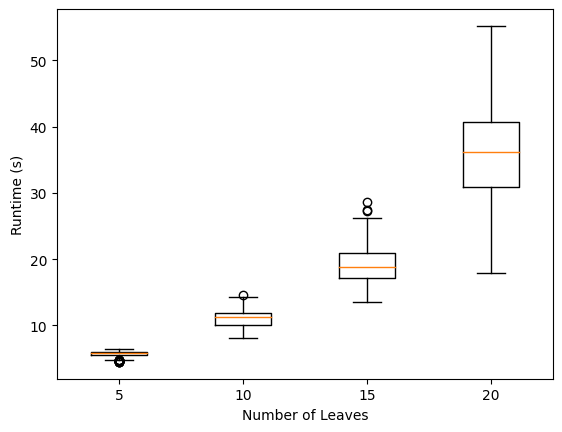

In [20]:
plt.boxplot(list(TIMES))
plt.xticks([1,2,3,4],[5,10,15,20])
plt.xlabel('Number of Leaves')
plt.ylabel('Runtime (s)')
#plt.legend()

In [21]:
TIMES = []

for npts in [25,30,35]:
    aux = np.load('times_'+str(npts)+'.npy')
    TIMES.append(aux)

Text(0, 0.5, 'Runtime (s)')

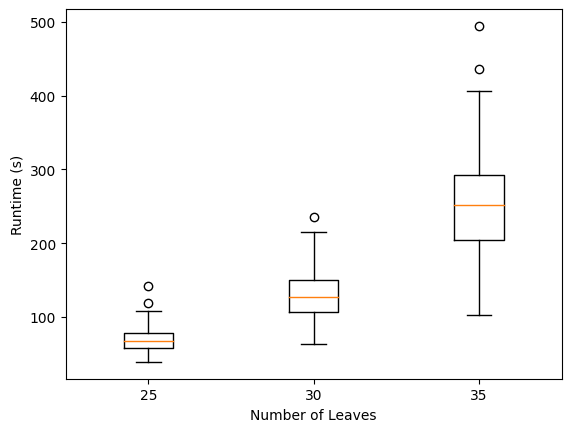

In [23]:
plt.boxplot(list(TIMES))
plt.xticks([1,2,3],[25,30,35])
plt.xlabel('Number of Leaves')
plt.ylabel('Runtime (s)')
#plt.legend()